<h1>Quantum Teleportation</h1>
<h3 style="text-align: left;">This is<em> Bob's</em> side of the quantum teleportation protocol.</h3>
<h4><span style="color: #ff0000;">It has to be executed first.</span></h4>
<p style="text-align: left;">The general procedure is: Alice prepares the Bell state, does here part of the teleportation protocol and sends these qubits to Bob.</p>
<p style="text-align: left;">Bob then needs to do the controlled gates on his qubits. As qiskit does not support measurements within the middle of the program, the controlled gates also need to be done via quantum communication.</p>
<p style="text-align: left;">For the communication we introduce two channel qubits, qubit 2 and 3. Alice prepared state is on qubit 0, the shared Bell state is on qubits 1 and 4.</p>

In [1]:
# needed qiskit library
from qiskit import *
%matplotlib inline

# the channel library providing the class Channel handling the communication
from channel_class import Channel

<h3 style="text-align: left;">Initialisation</h3>
In the following is the configuration of the overall protocoll. In the future, it should be possible to omit this.

In [2]:
#Bob needs to know the number of qubits, n_master: number of Alice qubits, n_slave: number of Bobs qubits
n_master = 2 
n_channel = 2
n_slave = 1

In [3]:
#initialise the Quantum Channel, Bobs port is 5001, Alice port is 5000
bob_channel = Channel(myport = 5001, remote_port = 5000)

RUNNNN... port = 5001


If Bob likes to do gates before Alice sends him something, he needs to create the circuit this way and could act on his qubits, which are [0,1,2,..] + offset, were offset=n_master

In [4]:
#initialise Bobs circuit
circ_bob = QuantumCircuit(n_master + n_channel + n_slave)

<h3 style="text-align: left;">Receive Qubits from Alice</h3>

In [5]:
#Bob recieves the qubits from Alice and needs to give his computations up to then into the function
#the function returns the circuit on which Bob continues to operate and an offset he has to add all the time
circ_bob, offset = bob_channel.receive(circ_bob)

Wait to receive
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
SocketChannel: the buff is empty, waiting...
b'\x80\x03}q\x00(X\x0c\x00\x00\x00state_vectorq\x01cqiskit.quantum_info.states.statevector\nStatevector\nq\x02)\x81q\x03}q\x04(X\x04\x00\x00\x00_repq\x05X\x0b\x00\x00\x00Statevectorq\x06X\x05\x00\x00\x00_dataq\x07cnumpy.core.multiarray\n_reconstruct\nq\x08cnumpy\nndarray\nq\tK\x00\x85q\nC\x01bq\x0b\x87q\x0cRq\r(K\x01K \x85q\x0ecnumpy\ndtype\nq\x0fX\x03\x00\x00\x00c16q\x10K\x00K\x01\x87q\x11Rq\x12(K\x03X\x01\x00\x00\x00<q\x13NNNJ\xff\xff\xff

<h3 style="text-align: left;">Teleportation Protocol</h3>
Bob has to do controlled gates on his qubit, where 0+offset and 1+offset are the communication qubits. 2+ offset is the qubit to which the state should be teleported to. 

In [6]:
# Bob does the controlled operations on his qubit (which is 0+offset) 
circ_bob.cx(1+offset,2+offset)
circ_bob.cz(0+offset,2+offset)

<h3 style="text-align: left;">Check the Results</h3>
To check, whether the right state was teleported, Bob undoes all the rotations Alice did in preparation of the state.

In [7]:
# Bob undoes the rotations Alice did to check, whether the states are indeed the same
circ_bob.rx(-0.1,2 + offset)
circ_bob.ry(-0.94,2 + offset)
circ_bob.rz(-0.54,2 + offset)
circ_bob.rx(-0.234,2 + offset)

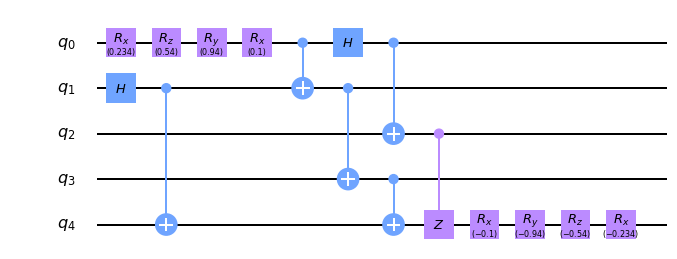

In [8]:
# The complete Circuit
circ_bob.draw(output='mpl',filename='teleport_bob.png')

Measurement of Bob's Qubit

In [9]:
# Bob measure his qubit, if the teleportation worked, he undoes exactly what Alice did
meas = QuantumCircuit(5,1)
meas.barrier(range(5))
meas.measure([4],range(1))
qc = circ_bob + meas

In [10]:
# The whole teleportation protocol is simulated
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc,backend_sim,shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

# if Bob undid all of Alice's steps correctly, the final state of his qubit is |0>
print(counts)



{'0': 1024}


So the final state on Bob's qubit is |0>, as we expected in undoing all of Alice preparation steps.